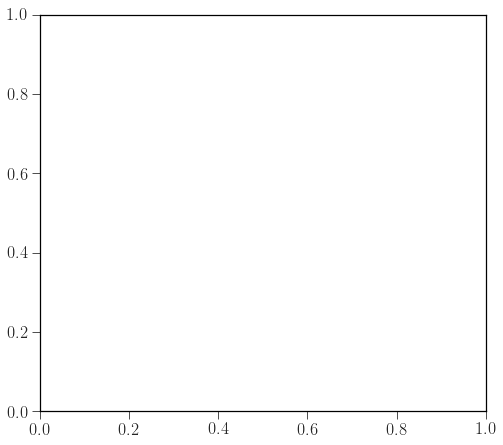

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = (8, 7.3)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'

plt.tick_params(size = 8 ,labelsize = 'large')

plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 14}

rc('font', **font)

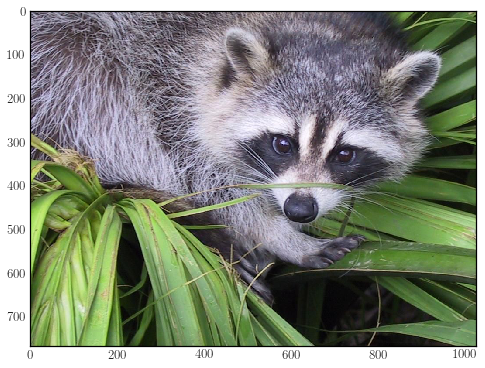

In [24]:
from scipy import misc
import imageio

racoon_image = misc.face()

imageio.imwrite("tmp.png", racoon_image)

plt.imshow(racoon_image)
plt.show()

In [25]:
face = imageio.imread("tmp.png")

print (f"Type of object : {type(face)}")
print (f"Shape of array : {face.shape}")
print (f"Data Type : {face.dtype}")

Type of object : <class 'imageio.core.util.Image'>
Shape of array : (768, 1024, 3)
Data Type : uint8


Shape of obtained array : (2359296,)
New shape : (768, 1024, 3)


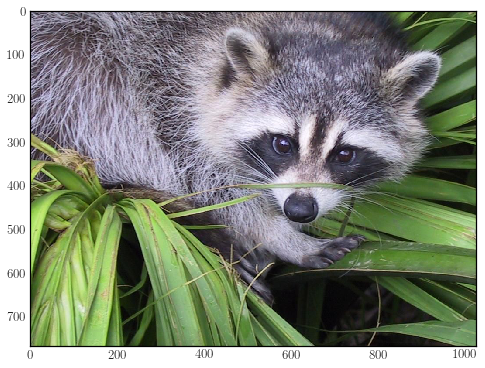

In [26]:
face.tofile("tmp.raw") # create raw file
face_from_raw = np.fromfile("tmp.raw", dtype = np.uint8)

print (f"Shape of obtained array : {face_from_raw.shape}")

face_from_raw.shape = face.shape

print (f"New shape : {face_from_raw.shape}")

plt.imshow(face_from_raw)
plt.show()

In [27]:
# need to know the shape and dtype of the image (how to separate data bytes)
# for large use we use np.memmap for memory mapping

face_memmap = np.memmap("tmp.raw", dtype = np.uint8, shape = face.shape)

# data are read from the file, and not loaded into memory

for i in range(10):
    im_part = np.random.randint(0, 256, 10000).reshape( (100, 100) )
    imageio.imsave(f"random_{i}.png", im_part)
    
# processing with a series of images
from glob import glob
filelist = glob("random_*.png")
filelist.sort()

/home/vit/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int64 to uint8, range [0, 255]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


# Displaying images

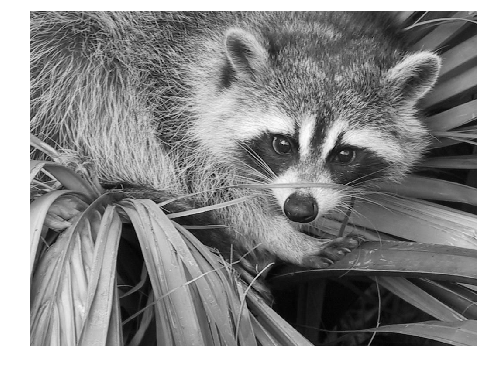

In [28]:
racoon_image = misc.face(gray = True)

plt.imshow(racoon_image, cmap = plt.cm.gray)
plt.axis("off")
plt.show()

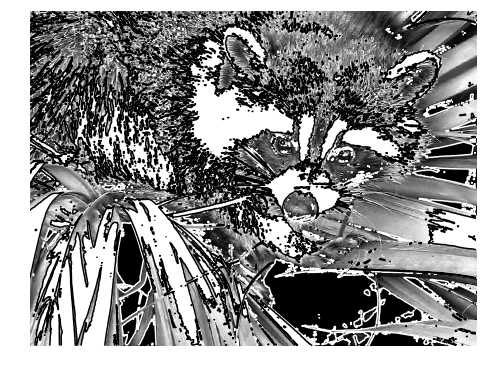

In [29]:
# increase the constrast by setting min and max values
# vmin and vmax define the data range that the colormap covers

plt.imshow(racoon_image, cmap = plt.cm.gray, vmin = 30, vmax = 150)
plt.axis("off")

# draw contour lines
plt.contour(racoon_image, (30, 150) )

plt.show()

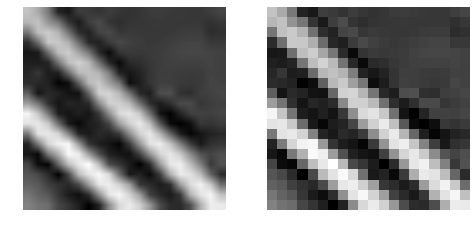

In [30]:
# use 'interpolation' param to varify intensity


plt.subplot(1, 2, 1)
plt.axis("off")

# For smooth intensity variations, use interpolation = 'bilinear'
plt.imshow(racoon_image[320:340, 510:530], cmap = plt.cm.gray, interpolation = "bilinear")

plt.subplot(1, 2, 2)
plt.axis("off")

#  For fine inspection of intensity variations, use interpolation = 'nearest'
plt.imshow(racoon_image[320:340, 510:530], cmap = plt.cm.gray, interpolation = "nearest")


plt.show()

# Basic manipulations

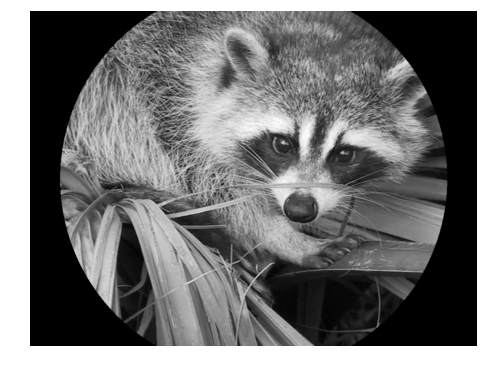

In [31]:
racoon_image = misc.face(gray = True)

lx, ly = racoon_image.shape

# add a mask to initial image
X, Y = np.ogrid[0 : lx, 0 : ly]
mask = (X - lx / 2)**2 + (Y - ly / 2)**2 > lx * ly / 4

racoon_image[mask] = 0 # remove info about external (ref to mask) regions

plt.imshow(racoon_image, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis("off")

plt.show()

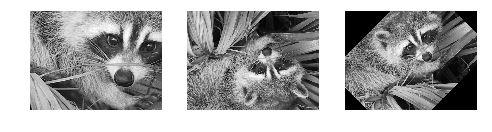

In [50]:
from scipy import ndimage

racoon_image = misc.face(gray = True)

lx, ly = racoon_image.shape
# cropping
cropped_racoon = racoon_image[lx // 4: - lx // 4, ly // 4: - ly // 4]

# up -> down flipping
flipped_racoon = np.flipud(racoon_image)

# rotation
rotated_racoon = ndimage.rotate(racoon_image, angle = 45, reshape = False)


plt.subplot(1, 3, 1)

plt.imshow(cropped_racoon, cmap = plt.cm.gray)
plt.axis("off")

plt.subplot(1, 3, 2)

plt.imshow(flipped_racoon, cmap = plt.cm.gray)
plt.axis("off")

plt.subplot(1, 3, 3)

plt.imshow(rotated_racoon, cmap = plt.cm.gray)
plt.axis("off")

plt.show()

## Blurring / smoothing

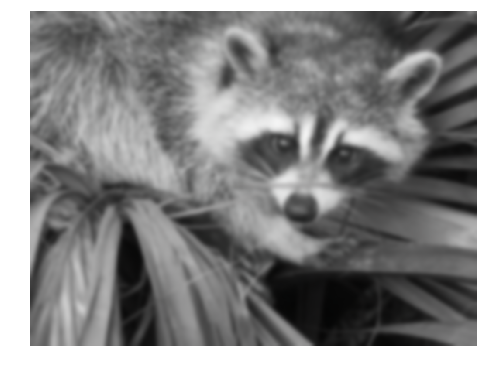

In [55]:
racoon_image = misc.face(gray = False)

blurred_racoon = ndimage.gaussian_filter(racoon_image, sigma = 3)
very_blurred_racoon = ndimage.gaussian_filter(racoon_image, sigma = 5)

plt.imshow(very_blurred_racoon)
plt.axis("off")
plt.show()

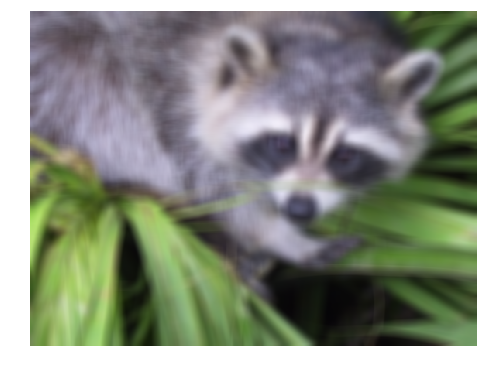

In [64]:
racoon_image = misc.face(gray = False)
uniformed_racoon = ndimage.uniform_filter(racoon_image, size = (25, 25, 1))

plt.imshow(uniformed_racoon)
plt.axis("off")
plt.show()

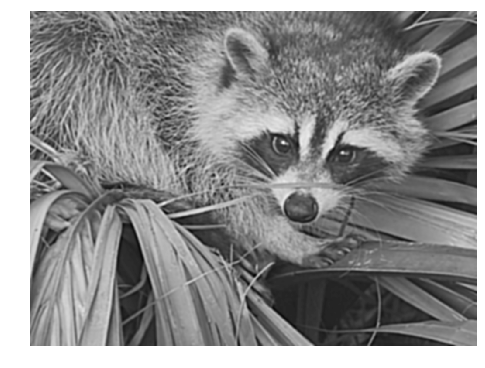

In [74]:
# make sharpening of initial image

racoon_image = misc.face(gray = True).astype(float)

blurred_racoon = ndimage.gaussian_filter(racoon_image, sigma = 3)


filter_blurred_racoon = ndimage.gaussian_filter(blurred_racoon, sigma = 1)

alpha = 30
sharped_racoon = blurred_racoon + alpha * (blurred_racoon - filter_blurred_racoon)

plt.imshow(sharped_racoon, cmap = plt.cm.gray)
plt.axis("off")
plt.show()

# Dealing with noise

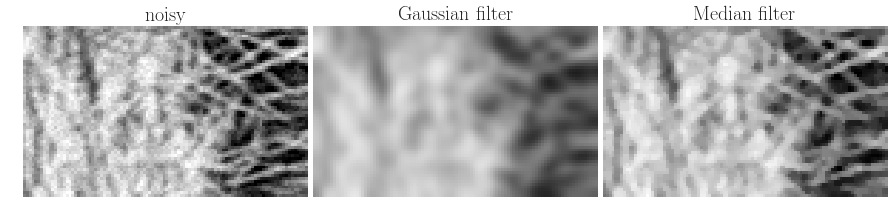

In [78]:
racoon_image = misc.face(gray = True)
racoon_image = racoon_image[230 : 290, 220 : 320]

noise = racoon_image + 0.5 * racoon_image.std() * np.random.random(racoon_image.shape)

# a Gaussian filter smoothes the noise out and the edges as well
gaussian_noise = ndimage.gaussian_filter(noise, 2)

# a median filter preserves better the edges:
med_noise = ndimage.median_filter(noise, 3)


plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noise, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gaussian_noise, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_noise, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

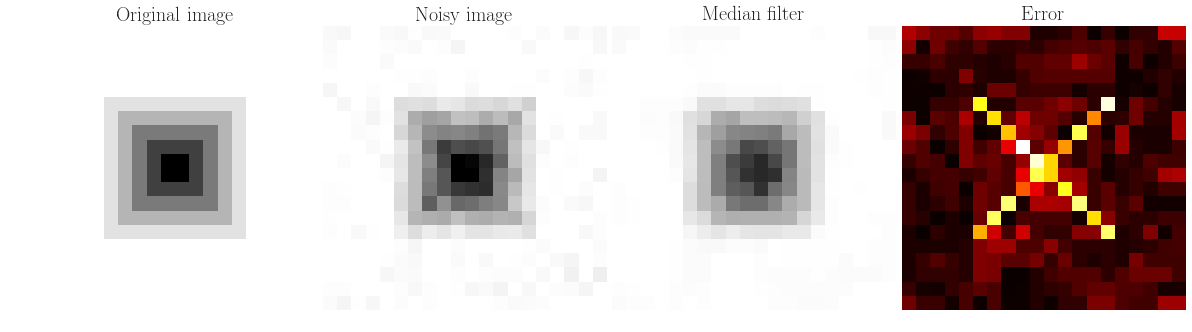

In [82]:
# Median filter: better result for straight boundaries (low curvature):

im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2 * np.random.randn(*im.shape)

im_med = ndimage.median_filter(im_noise, 3)

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

plt.show()